Equilibrium points at s = 10, r = 28, and b = 8/3
 {(-8.48528137423857, -8.48528137423857, 27.0), (0, 0, 0), (8.48528137423857, 8.48528137423857, 27.0)} 



<IPython.core.display.Javascript object>


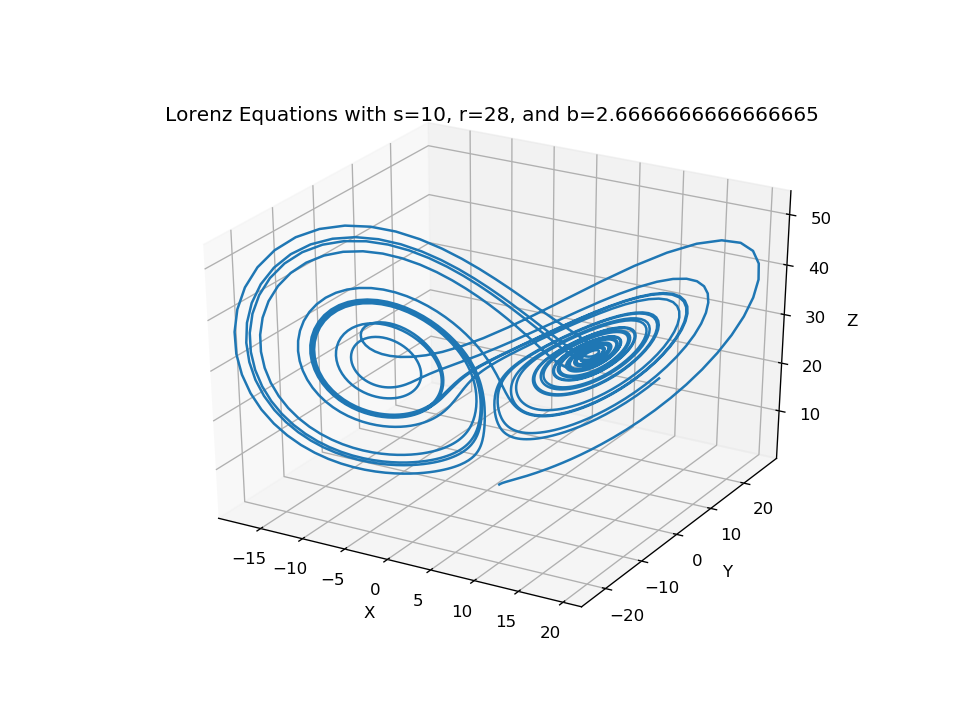

<IPython.core.display.Javascript object>


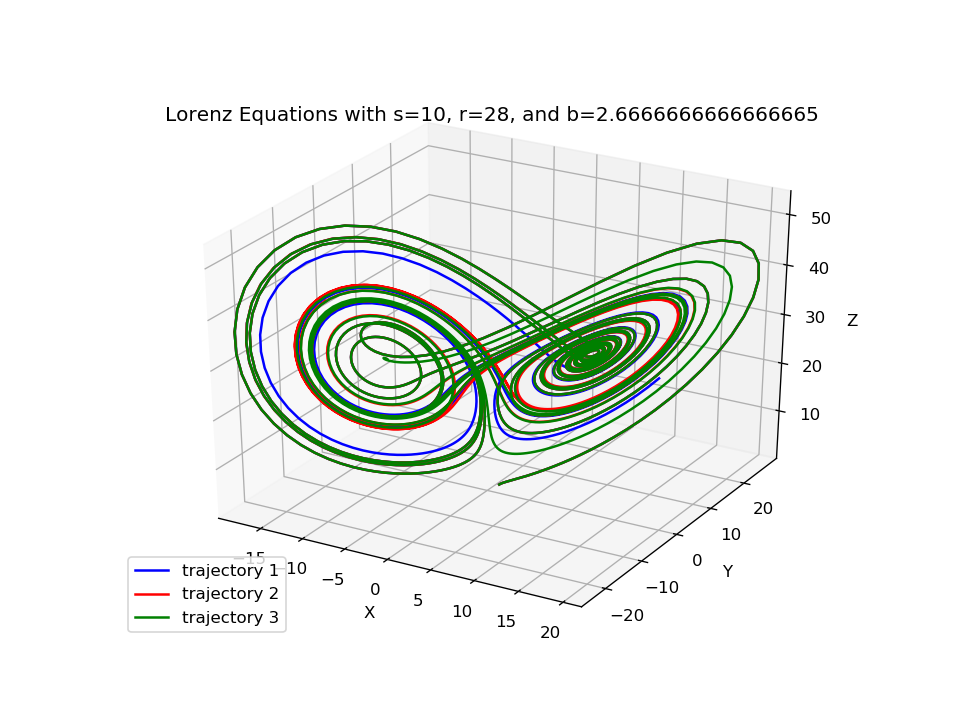

<IPython.core.display.Javascript object>


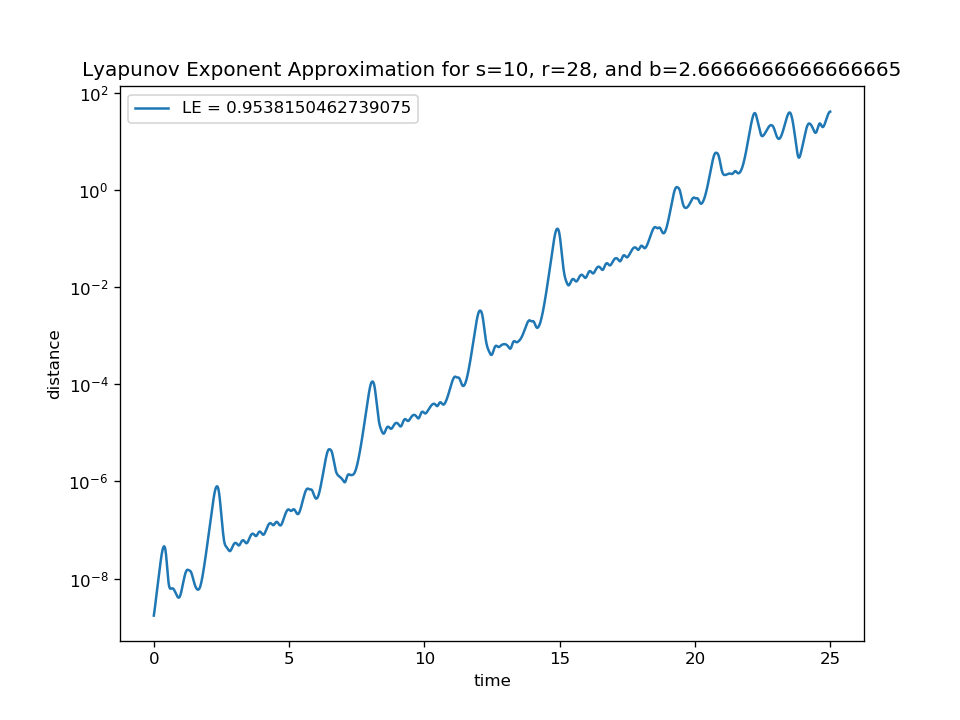

0.9538150462739075

In [1]:
#Tohidul Islam, final project

#Opens plots in a separate window
#%matplotlib qt
#Shows plots in notebook, slower with animations
%matplotlib notebook
from pylab import *
from numpy import *
from scipy.optimize import *
from scipy.stats import linregress
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
rcParams['animation.ffmpeg_path'] = r'C:\\FFmpeg\\bin\\ffmpeg.exe'

#Defining a function that returns values of change in x, y, and z
def equations(x, y, z, s=10, r=28, b=8/3):
    dxdt = s * (y - x)
    dydt = r * x - y - x * z
    dzdt = x * y - b * z
    return dxdt, dydt, dzdt

#Using sympy's nonlinsolve for all equilibrium points at a given s, r, and b
def eqPoints(s=10, r=28, b=8/3):
    x,y,z = sp.symbols('x, y, z')
    return sp.nonlinsolve(equations(x,y,z,s,r,b),[x, y, z])

#Letting initial values of s, r, and b be 10, 28, and 8/3 respectively
print("Equilibrium points at s = 10, r = 28, and b = 8/3\n",eqPoints(),"\n")

#Function for obtaining the values of x, y, and z over time
def allVals(x0, y0, z0, s=10, r=28, b=8/3, dt=0.01, t=25):
    xVals = [x0]
    yVals = [y0]
    zVals = [z0]
    times = [0]
    counter = 0
    while times[counter] < t:
        xn, yn, zn = equations(xVals[counter],yVals[counter],zVals[counter],s,r,b)
        xVals.append(xVals[counter] + (xn * dt))
        yVals.append(yVals[counter] + (yn * dt))
        zVals.append(zVals[counter] + (zn * dt))
        times.append(times[counter] + dt)
        counter += 1
    return xVals, yVals, zVals, times

#functions for animating the phase space
def init():
    drawing.set_data([], [])
    drawing.set_3d_properties([])
    return drawing,

def update(val):
    drawing.set_data(xVals[:val], yVals[:val])
    drawing.set_3d_properties(zVals[:val])
    ax.view_init(30, 1 * val)
    fig.canvas.draw()
    return drawing,

#Animated phase space, mainly using this for analysis while 
#writing the report, animations too slow to use too many of 
#during presentation
#xVals, yVals, zVals, times = allVals(0.1, 0.1, 0.1, r=1.5)
#fig = figure(figsize=(8, 6), dpi=120)
#ax = gca(projection='3d')
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#ax.set_xlim3d([min(xVals), max(xVals)])
#ax.set_ylim3d([min(yVals), max(yVals)])
#ax.set_zlim3d([min(zVals), max(zVals)])
#ax.set_title("Lorenz Equations with s=10, r=1.5, and b=8/3")
#drawing, = ax.plot([],[],[], '-')
#ani = FuncAnimation(fig, update, init_func=init, frames=len(xVals), interval=1, blit=True)
#f = r"e:\\SeniorDesign\\FinalProjectSpring\\graphs\\req15.mp4" 
#writervideo = FFMpegWriter(fps=60) 
#ani.save(f, writer=writervideo)

#Function for displaying the phase space with static graph
def phaseSpace3D(x, y, z, s=10, r=28, b=8/3):
    figStatic = figure(figsize=(8, 6), dpi=120)
    axStatic = gca(projection='3d')
    axStatic.plot(x, y, z)
    axStatic.set_xlabel('X')
    axStatic.set_ylabel('Y')
    axStatic.set_zlabel('Z')
    axStatic.set_xlim3d([min(x), max(x)])
    axStatic.set_ylim3d([min(y), max(y)])
    axStatic.set_zlim3d([min(z), max(z)])
    axStatic.set_title("Lorenz Equations with s=" + str(s) + ", r=" + str(r) + ", and b=" + str(b))
    show()

x, y, z, times = allVals(1, 1, 1)
phaseSpace3D(x, y, z)

#Function for getting Lyapunov exponent approximation
#at a given s, r, or b value
def approxLE(s=10, r=28, b=8/3, draw=False):
    ep = 1e-9
    x, y, z, times = allVals(1, 1, 1, s, r, b)
    xp, yp, zp, times = allVals(1+ep, 1+ep, 1+ep, s, r, b)
    xp2, yp2, zp2, times = allVals(1-ep, 1-ep, 1-ep, s, r, b)
    d = []
    for i in range(0,len(x),1):
        d.append(
            (sqrt((abs(x[i] - xp[i]))**2 + (abs(y[i] - yp[i]))**2 + (abs(z[i] - zp[i]))**2)
            +
            sqrt((abs(x[i] - xp2[i]))**2 + (abs(y[i] - yp2[i]))**2 + (abs(z[i] - zp2[i]))**2))
            /2 + sys.float_info.epsilon
        )
    if draw:
        #Plotting multiple trajectories in phase space
        figMulti = figure(figsize=(8, 6), dpi=120)
        axMulti = gca(projection='3d')
        axMulti.plot(x, y, z, label='trajectory 1', color='b')
        axMulti.plot(xp, yp, zp, label='trajectory 2', color='r')
        axMulti.plot(xp2, yp2, zp2, label='trajectory 3', color='g')
        axMulti.set_xlabel('X')
        axMulti.set_ylabel('Y')
        axMulti.set_zlabel('Z')
        axMulti.set_xlim3d([min(x), max(x)])
        axMulti.set_ylim3d([min(y), max(y)])
        axMulti.set_zlim3d([min(z), max(z)])
        axMulti.set_title("Lorenz Equations with s=" + str(s) + ", r=" + str(r) + ", and b=" + str(b))
        axMulti.legend(loc='lower left')
        show()
        #Plotting distances between points
        figLE = figure(figsize=(8, 6), dpi=120)
        semilogy(times, d,label='LE = '+str(linregress(times,log(d)).slope))
        xlabel('time')
        ylabel('distance')
        title("Lyapunov Exponent Approximation for s=" + str(s) + ", r=" + str(r) + ", and b=" + str(b))
        legend()
        show()
    logd = log(d)
    return linregress(times,logd).slope

approxLE(draw=True)

<IPython.core.display.Javascript object>


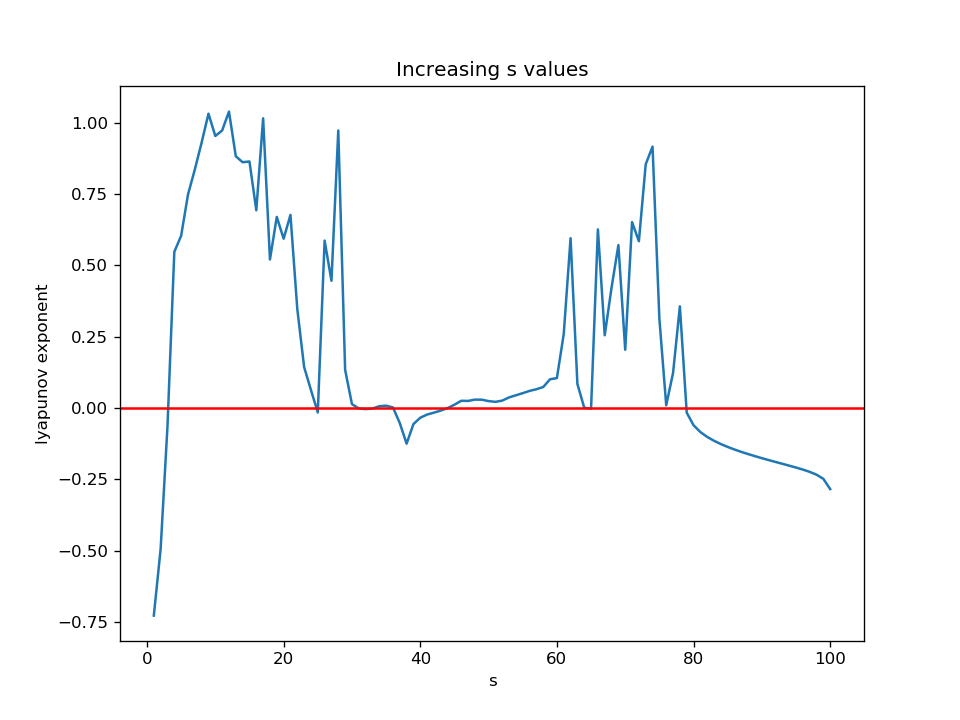

<IPython.core.display.Javascript object>


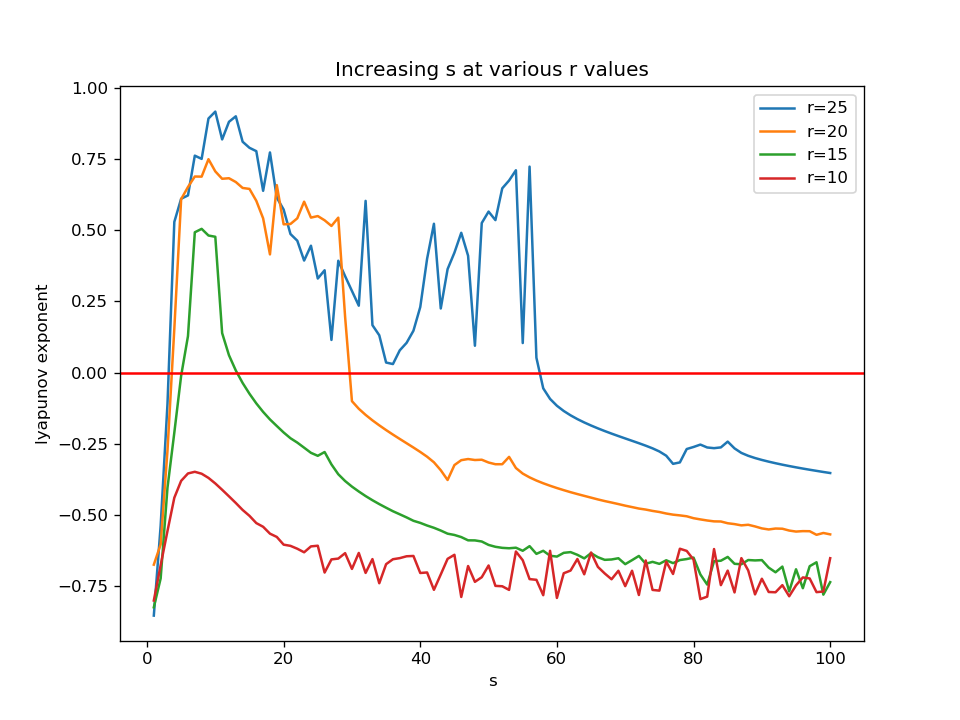

<IPython.core.display.Javascript object>


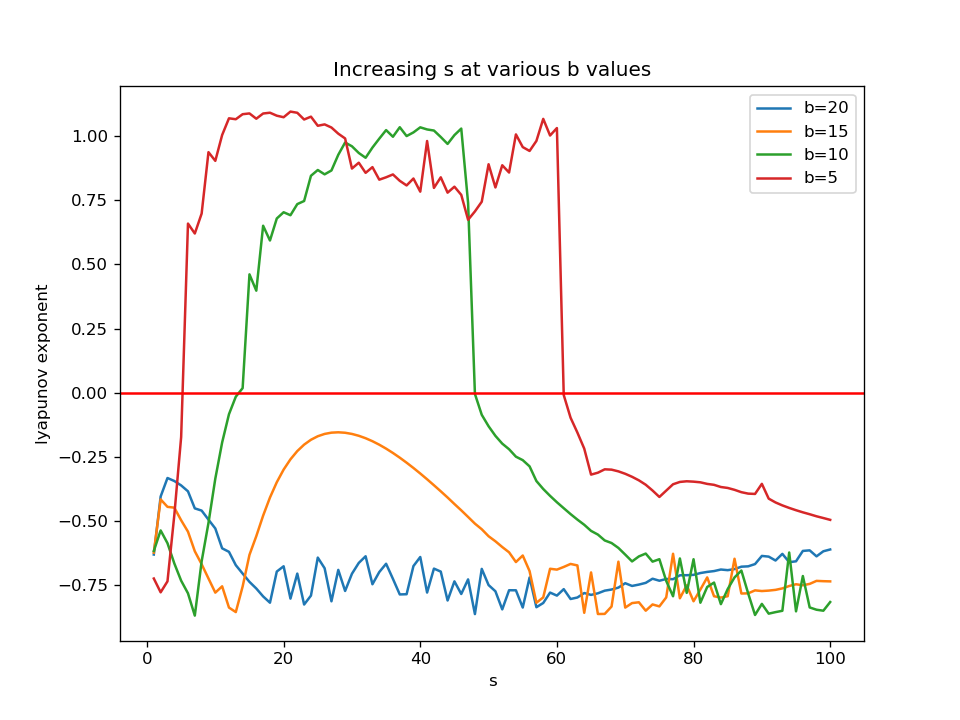

In [2]:
#Testing lyapunov exponents over first 100 values of s
sle = []
for i in range(1,101,1):
    sle.append(approxLE(s=i))
fig1a = figure(figsize=(8, 6), dpi=120)
plot(range(1,101,1),sle)
axhline(y=0, color='r', linestyle='-')
xlabel('s')
ylabel('lyapunov exponent')
title('Increasing s values')
show()

#Showing s values in relation to r values
sle = []
for i in range(1,101,1):
    sle.append(approxLE(s=i, r=25))
fig1b = figure(figsize=(8, 6), dpi=120)
plot(range(1,101,1),sle,label='r=25')
sle = []
for i in range(1,101,1):
    sle.append(approxLE(s=i, r=20))
plot(range(1,101,1),sle,label='r=20')
sle = []
for i in range(1,101,1):
    sle.append(approxLE(s=i, r=15))
plot(range(1,101,1),sle,label='r=15')
sle = []
for i in range(1,101,1):
    sle.append(approxLE(s=i, r=10))
plot(range(1,101,1),sle,label='r=10')
axhline(y=0, color='r', linestyle='-')
xlabel('s')
ylabel('lyapunov exponent')
title('Increasing s at various r values')
legend()
show()

#Showing s values in relation to b values
sle = []
for i in range(1,101,1):
    sle.append(approxLE(s=i, b=20))
fig1c = figure(figsize=(8, 6), dpi=120)
plot(range(1,101,1),sle,label='b=20')
sle = []
for i in range(1,101,1):
    sle.append(approxLE(s=i, b=15))
plot(range(1,101,1),sle,label='b=15')
sle = []
for i in range(1,101,1):
    sle.append(approxLE(s=i, b=10))
plot(range(1,101,1),sle,label='b=10')
sle = []
for i in range(1,101,1):
    sle.append(approxLE(s=i, b=5))
plot(range(1,101,1),sle,label='b=5')
axhline(y=0, color='r', linestyle='-')
xlabel('s')
ylabel('lyapunov exponent')
title('Increasing s at various b values')
legend()
show()

<IPython.core.display.Javascript object>


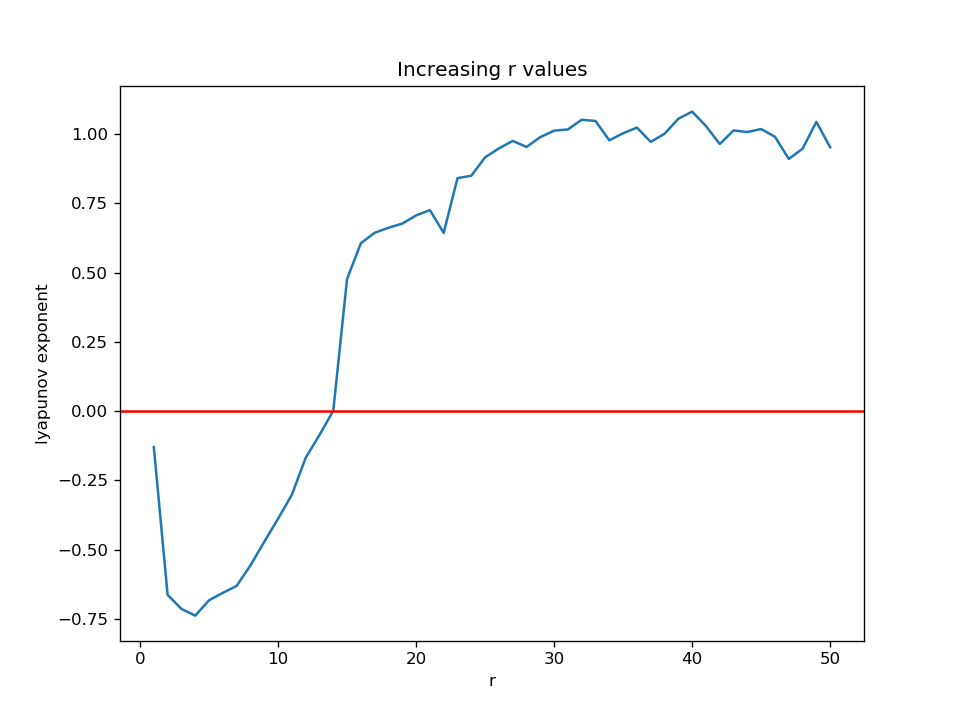

<IPython.core.display.Javascript object>


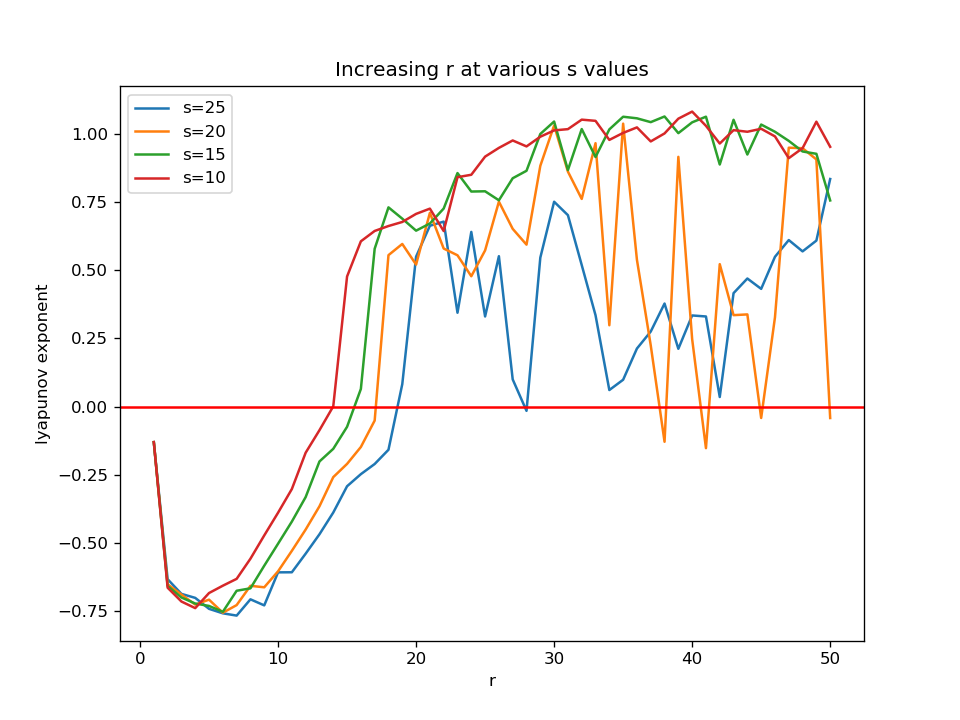

<IPython.core.display.Javascript object>


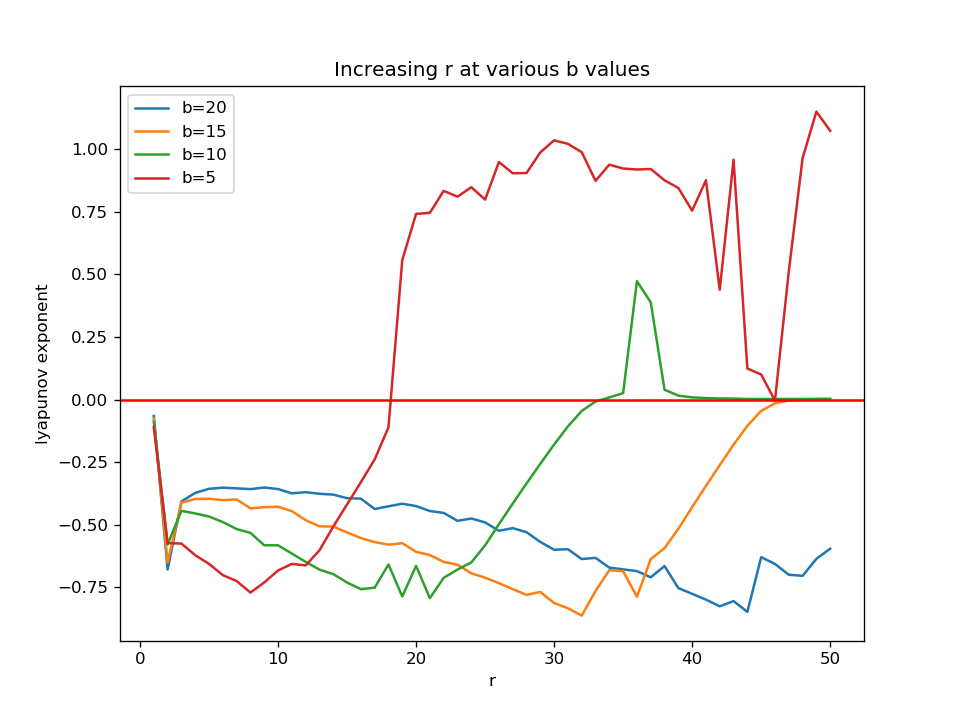

In [3]:
#Displaying lyapunov exponents for r values
rle = []
for i in range(1,51,1):
    rle.append(approxLE(r=i))
fig2a = figure(figsize=(8, 6), dpi=120)
plot(range(1,51,1),rle)
axhline(y=0, color='r', linestyle='-')
xlabel('r')
ylabel('lyapunov exponent')
title('Increasing r values')
show()

#Showing r values in relation to s values
rle = []
for i in range(1,51,1):
    rle.append(approxLE(r=i, s=25))
fig2b = figure(figsize=(8, 6), dpi=120)
plot(range(1,51,1),rle,label='s=25')
rle = []
for i in range(1,51,1):
    rle.append(approxLE(r=i, s=20))
plot(range(1,51,1),rle,label='s=20')
rle = []
for i in range(1,51,1):
    rle.append(approxLE(r=i, s=15))
plot(range(1,51,1),rle,label='s=15')
rle = []
for i in range(1,51,1):
    rle.append(approxLE(r=i, s=10))
plot(range(1,51,1),rle,label='s=10')
axhline(y=0, color='r', linestyle='-')
xlabel('r')
ylabel('lyapunov exponent')
title('Increasing r at various s values')
legend()
show()

#Showing r values in relation to b values
rle = []
for i in range(1,51,1):
    rle.append(approxLE(r=i, b=20))
fig2c = figure(figsize=(8, 6), dpi=120)
plot(range(1,51,1),rle,label='b=20')
rle = []
for i in range(1,51,1):
    rle.append(approxLE(r=i, b=15))
plot(range(1,51,1),rle,label='b=15')
rle = []
for i in range(1,51,1):
    rle.append(approxLE(r=i, b=10))
plot(range(1,51,1),rle,label='b=10')
rle = []
for i in range(1,51,1):
    rle.append(approxLE(r=i, b=5))
plot(range(1,51,1),rle,label='b=5')
axhline(y=0, color='r', linestyle='-')
xlabel('r')
ylabel('lyapunov exponent')
title('Increasing r at various b values')
legend()
show()

<IPython.core.display.Javascript object>


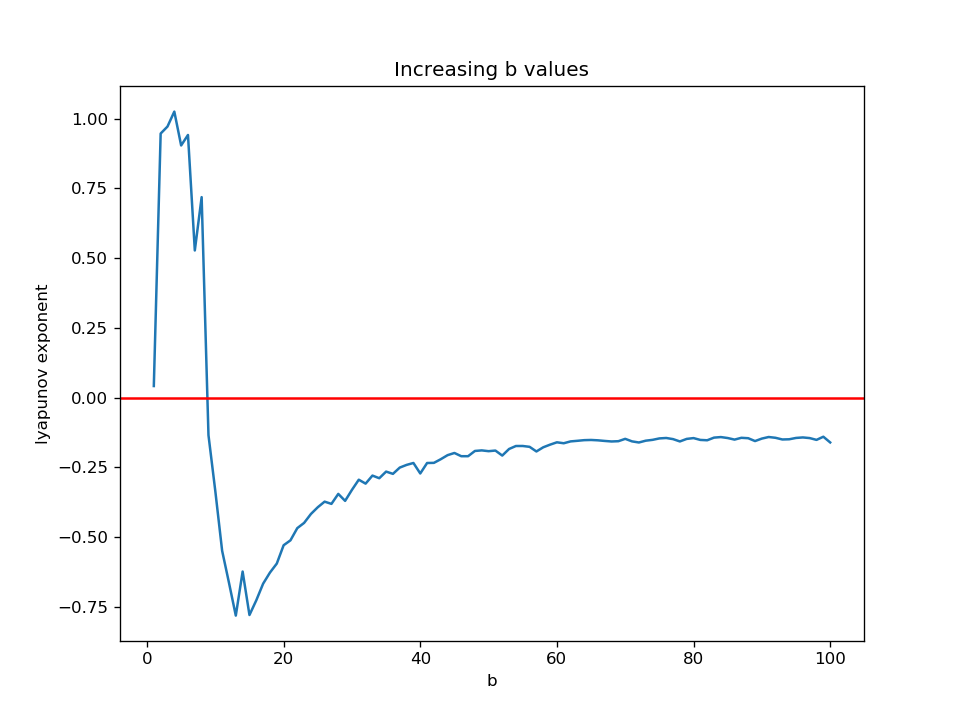

<IPython.core.display.Javascript object>


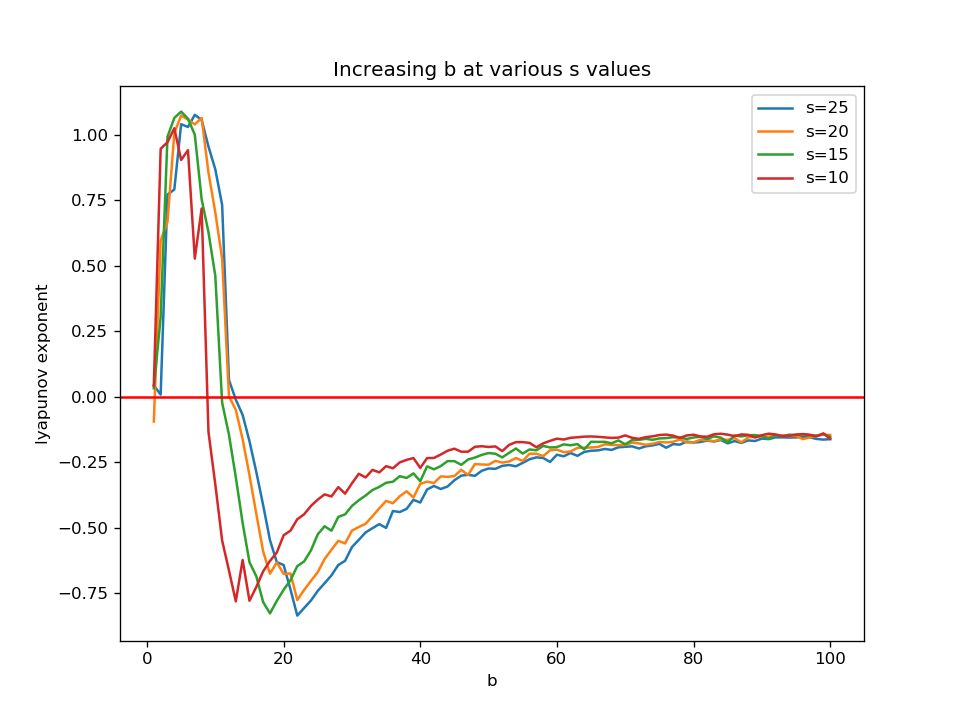

<IPython.core.display.Javascript object>


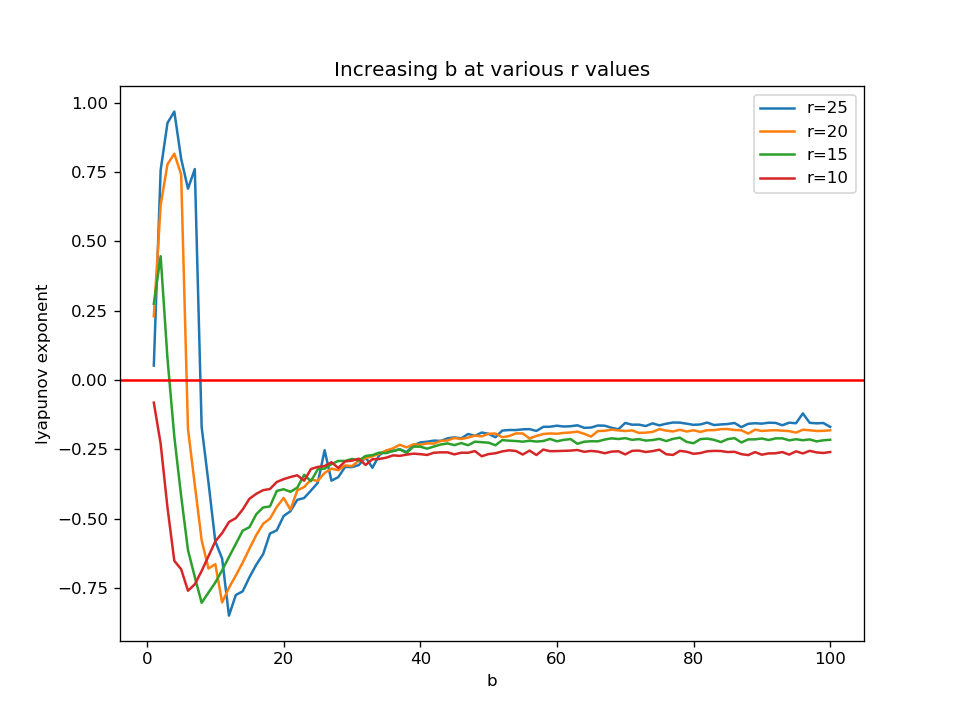

In [4]:
#Testing lyapunov exponents over first 50 values of b
ble = []
for i in range(1,101,1):
    ble.append(approxLE(b=i))
fig3a = figure(figsize=(8, 6), dpi=120)
plot(range(1,101,1),ble)
axhline(y=0, color='r', linestyle='-')
xlabel('b')
ylabel('lyapunov exponent')
title('Increasing b values')
show()

#Showing b values in relation to s values
ble = []
for i in range(1,101,1):
    ble.append(approxLE(b=i, s=25))
fig3b = figure(figsize=(8, 6), dpi=120)
plot(range(1,101,1),ble,label='s=25')
ble = []
for i in range(1,101,1):
    ble.append(approxLE(b=i, s=20))
plot(range(1,101,1),ble,label='s=20')
ble = []
for i in range(1,101,1):
    ble.append(approxLE(b=i, s=15))
plot(range(1,101,1),ble,label='s=15')
ble = []
for i in range(1,101,1):
    ble.append(approxLE(b=i, s=10))
plot(range(1,101,1),ble,label='s=10')
axhline(y=0, color='r', linestyle='-')
xlabel('b')
ylabel('lyapunov exponent')
title('Increasing b at various s values')
legend()
show()

#Showing b values in relation to r values
ble = []
for i in range(1,101,1):
    ble.append(approxLE(b=i, r=25))
fig3c = figure(figsize=(8, 6), dpi=120)
plot(range(1,101,1),ble,label='r=25')
ble = []
for i in range(1,101,1):
    ble.append(approxLE(b=i, r=20))
plot(range(1,101,1),ble,label='r=20')
ble = []
for i in range(1,101,1):
    ble.append(approxLE(b=i, r=15))
plot(range(1,101,1),ble,label='r=15')
ble = []
for i in range(1,101,1):
    ble.append(approxLE(b=i, r=10))
plot(range(1,101,1),ble,label='r=10')
axhline(y=0, color='r', linestyle='-')
xlabel('b')
ylabel('lyapunov exponent')
title('Increasing b at various r values')
legend()
show()

<IPython.core.display.Javascript object>


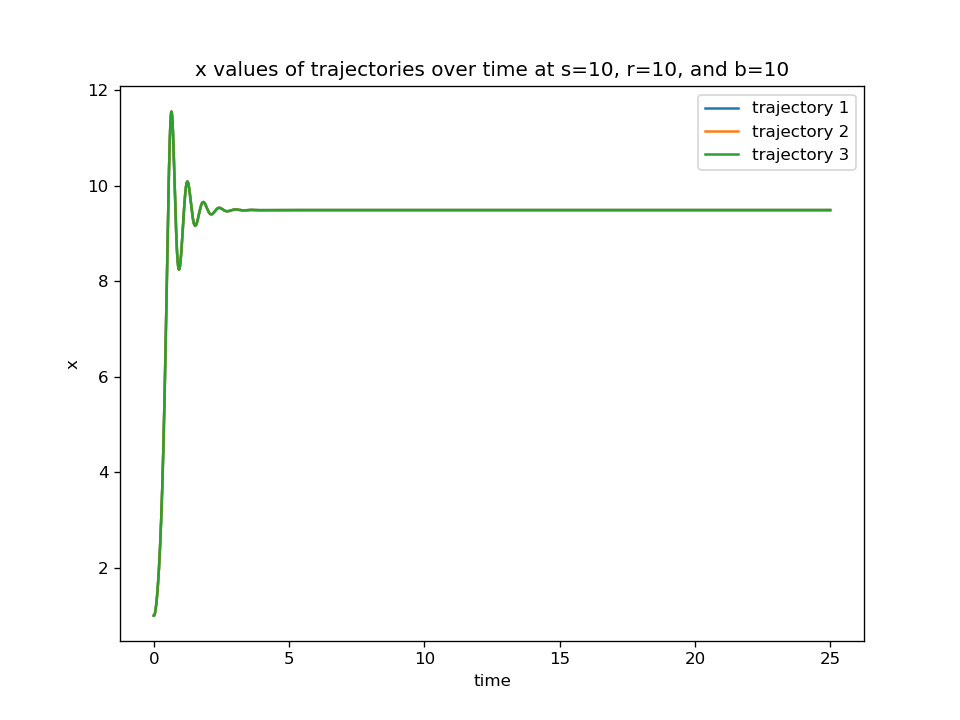

<IPython.core.display.Javascript object>


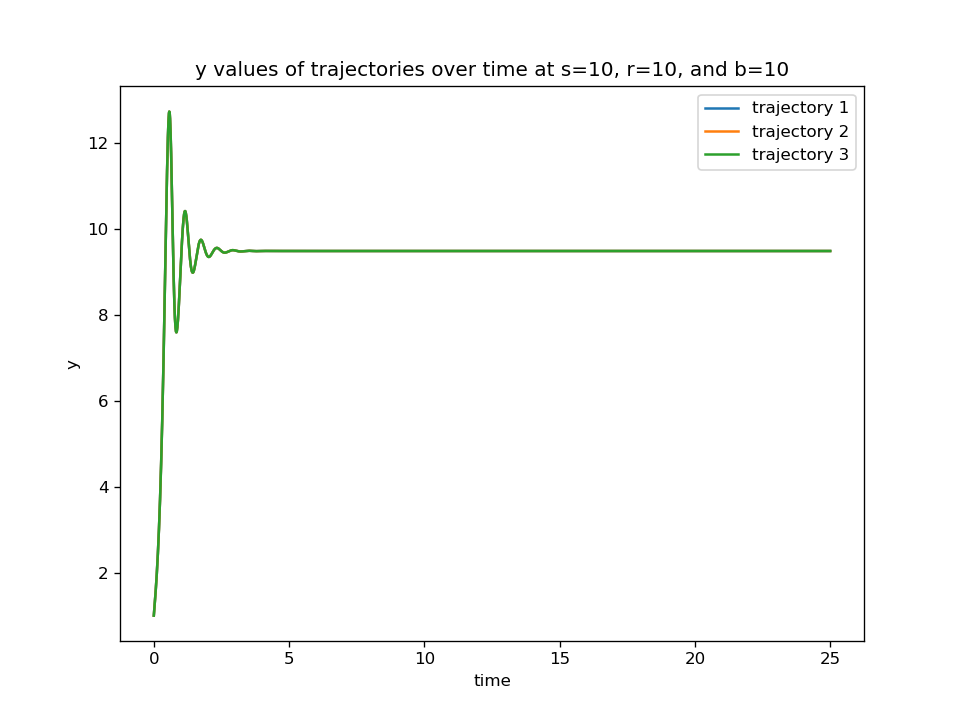

<IPython.core.display.Javascript object>


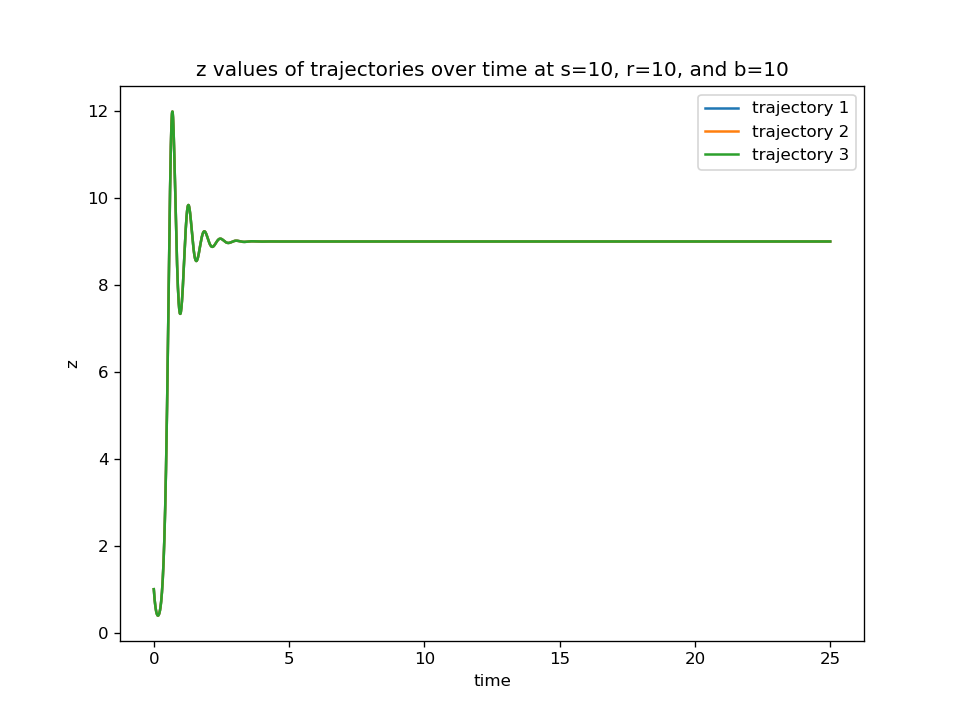

<IPython.core.display.Javascript object>


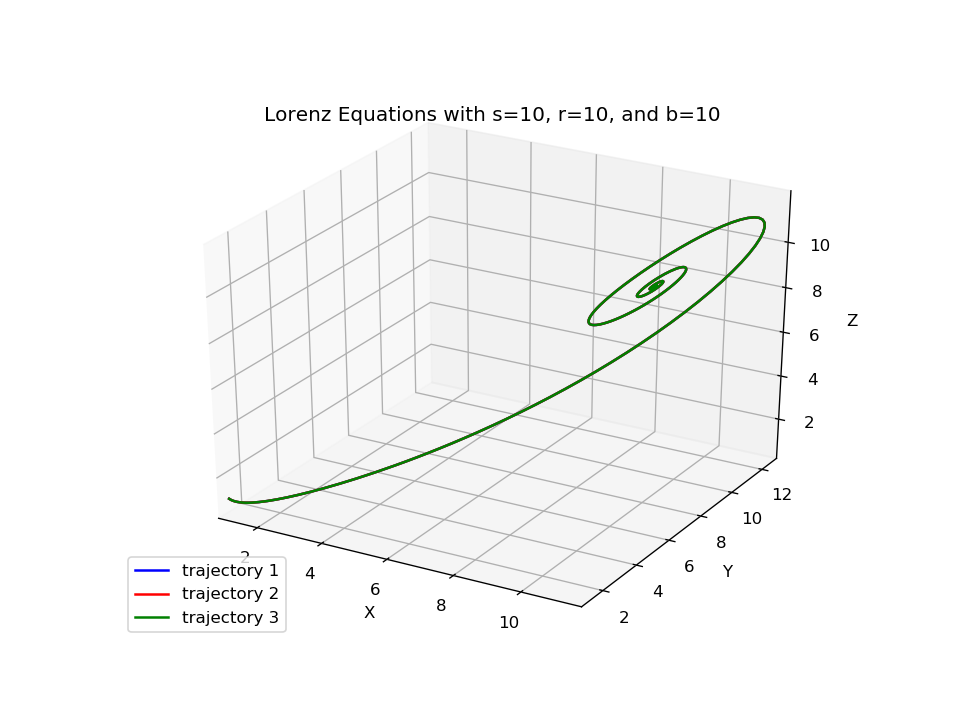

<IPython.core.display.Javascript object>


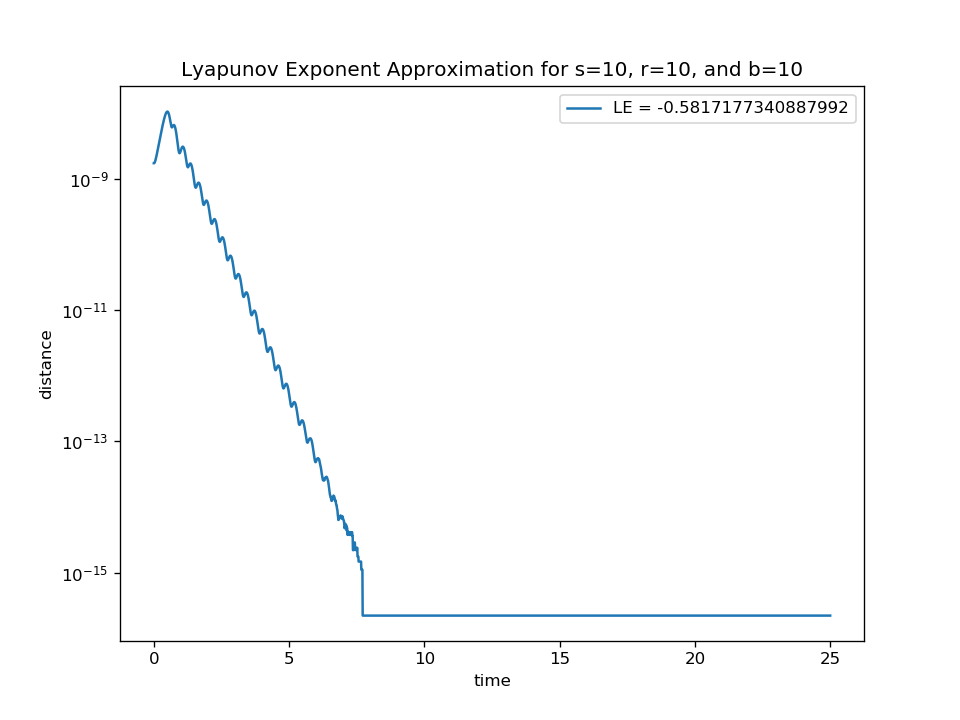

-0.5817177340887992

In [5]:
#These tests indicate that there is no
#significant chaos in the system at small
#r values, large b values, and any value for s
#when r and b satisfy this. We test this
#by taking three trajectories at such values 
#with small perturbations in initial condition

#let s = 10, r = 10, and b = 10

#trajectory 1
xt1, yt1, zt1, times = allVals(1,1,1,s=10,r=10,b=10)

#trajectory 2
xt2, yt2, zt2, times = allVals(1+(1e-9),1+(1e-9),1+(1e-9),s=10,r=10,b=10)

#trajectory 3
xt3, yt3, zt3, times = allVals(1-(1e-9),1-(1e-9),1-(1e-9),s=10,r=10,b=10)

#plotting x values
noChaosX = figure(figsize=(8, 6), dpi=120)
plot(times,xt1,label='trajectory 1')
plot(times,xt2,label='trajectory 2')
plot(times,xt3,label='trajectory 3')
xlabel('time')
ylabel('x')
title('x values of trajectories over time at s=10, r=10, and b=10')
legend()
show()
noChaosY = figure(figsize=(8, 6), dpi=120)
plot(times,yt1,label='trajectory 1')
plot(times,yt2,label='trajectory 2')
plot(times,yt3,label='trajectory 3')
xlabel('time')
ylabel('y')
title('y values of trajectories over time at s=10, r=10, and b=10')
legend()
show()
noChaosZ = figure(figsize=(8, 6), dpi=120)
plot(times,zt1,label='trajectory 1')
plot(times,zt2,label='trajectory 2')
plot(times,zt3,label='trajectory 3')
xlabel('time')
ylabel('z')
title('z values of trajectories over time at s=10, r=10, and b=10')
legend()
show()
approxLE(s=10,r=10,b=10,draw=True)

#Observations - no noticable difference between trajectories
#with small perturbation. So earlier observation holds true.

Equilibrium points at s = 1 
 {(-8.48528137423857, -8.48528137423857, 27.0), (0, 0, 0), (8.48528137423857, 8.48528137423857, 27.0)} 

Equilibrium points at s = 2 
 {(-8.48528137423857, -8.48528137423857, 27.0), (0, 0, 0), (8.48528137423857, 8.48528137423857, 27.0)} 

Equilibrium points at s = 3 
 {(-8.48528137423857, -8.48528137423857, 27.0), (0, 0, 0), (8.48528137423857, 8.48528137423857, 27.0)} 

Equilibrium points at s = 4 
 {(-8.48528137423857, -8.48528137423857, 27.0), (0, 0, 0), (8.48528137423857, 8.48528137423857, 27.0)} 

Equilibrium points at s = 5 
 {(-8.48528137423857, -8.48528137423857, 27.0), (0, 0, 0), (8.48528137423857, 8.48528137423857, 27.0)} 

Equilibrium points at s = 6 
 {(-8.48528137423857, -8.48528137423857, 27.0), (0, 0, 0), (8.48528137423857, 8.48528137423857, 27.0)} 

Equilibrium points at s = 7 
 {(-8.48528137423857, -8.48528137423857, 27.0), (0, 0, 0), (8.48528137423857, 8.48528137423857, 27.0)} 

Equilibrium points at s = 8 
 {(-8.48528137423857, -8.48528137

<IPython.core.display.Javascript object>


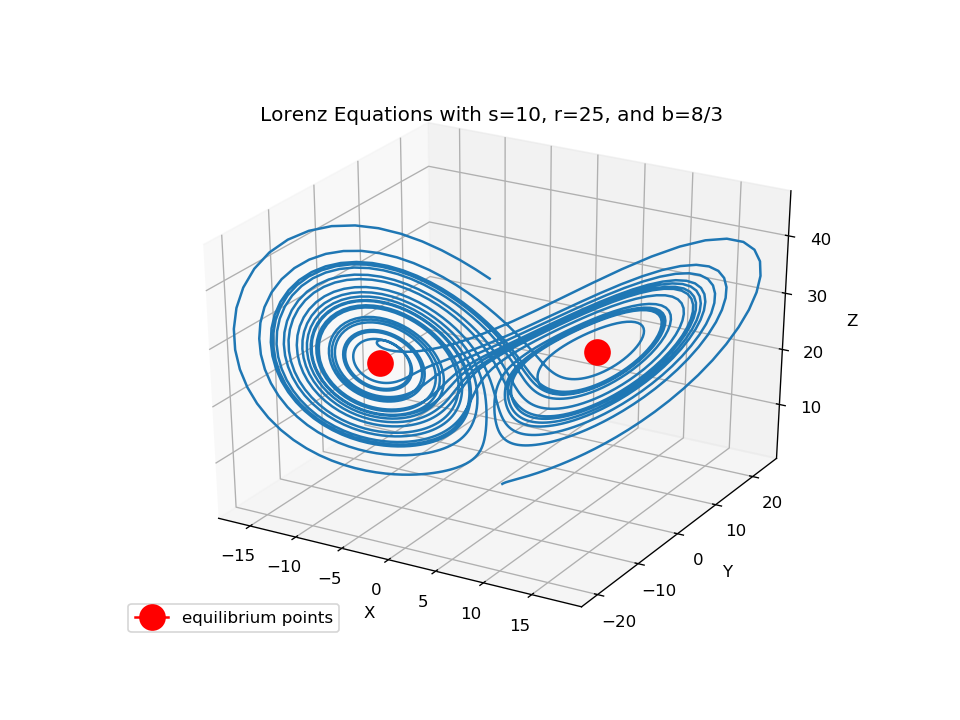

In [6]:
#testing equilibrium points at varying values of s
#keeping all other values the same
for i in range(1,11,1):
    print("Equilibrium points at s =",i,"\n",eqPoints(s=i),"\n")
    
#Observations - We see that there is no change in the 
#equilibrium points as we change the values of s which
#represents viscosity/thermal conductivity in atmospheric
#convection. 

#testing equilibrium points at varying values of r
#keeping all other values the same
for i in range(1,11,1):
    print("Equilibrium points at r =",i,"\n",eqPoints(r=i),"\n")
    
#Observations - we notice that at r > 1 the system
#always has three equilibrium points which includes 
#(0,0,0). However, at r = 1 we notice only a single 
#equilibrium point. At r < 1 there are three equilibriun 
#points, but only one of them, (0,0,0), is real.

#testing equilibrium points at varying values of b
#keeping all other values the same
for i in range(1,11,1):
    print("Equilibrium points at b =",i,"\n",eqPoints(b=i),"\n")
    
#Observations - We see that there is a change in the values
#of the equilibrium points, but they are increasing at
# a steady rate with no radical fluxuations

#From these tests we see that the values of r
#provide the most varience in the equilibrium points 
#of the system, so an analysis of its various
#equilibrium points may help provide more 
#information about its attractors and the 
#behavior of atmospheric convection.
#equilibrium points of interest are at
#r=1, r<1 (0.5), and r>1 (1.5)

#jacobian matrix of this stystem is:
#     [ -s    s    0 ]
#     [ r-z  -1   -x ]
#     [ y     x   -b ]
#Values of s and b will be 10 and 8/3

#analysis of equilibrium points at r = 0.5
points1 = eqPoints(r=0.5)
print("\nEquilibrium points at r = 0.5:")
print(points1)
jcob1 = array([[(-10),(10),(0)],
              [(0.5),(-1),(0)],
              [(0),(0),(-8/3)]])
print("\nEigenvalue for when r = 0.5:")
eigenVals1,temp = linalg.eig(jcob1)
print(eigenVals1,'\n')

#analysis of equilibrium points at r = 1
print("\nEquilibrium points at r = 1:")
points2 = eqPoints(r=1)
print(points2)
jcob2 = array([[(-10),(10),(0)],
              [(1),(-1),(0)],
              [(0),(0),(-8/3)]])
print("\nEigenvalue for when r = 1:")
eigenVals2,temp = linalg.eig(jcob2)
print(eigenVals2,'\n')

#analysis of equilibrium points at r = 1.5
print("\nEquilibrium points at r = 1.5:")
points3 = eqPoints(r=1.5)
print(points3)

#First equilibrium point
jcob3a = array([[(-10),(10),(0)],
              [(1),(-1),(1.15470053837925)],
              [(-1.15470053837925),(-1.15470053837925),(-8/3)]])
print("\nEigenvalue for when r = 1.5 at first point:")
eigenVals3a,temp = linalg.eig(jcob3a)
print(eigenVals3a,'\n')

#Second equilibrium point
jcob3b = array([[(-10),(10),(0)],
              [(1.5),(-1),(0)],
              [(0),(0),(-8/3)]])
print("\nEigenvalue for when r = 1.5 at second point:")
eigenVals3b,temp = linalg.eig(jcob3b)
print(eigenVals3b,'\n')

#Third equilibrium point
jcob3c = array([[(-10),(10),(0)],
              [(1),(-1),(-1.15470053837925)],
              [(1.15470053837925),(1.15470053837925),(-8/3)]])
print("\nEigenvalue for when r = 1.5 at third point:")
eigenVals3c,temp = linalg.eig(jcob3c)
print(eigenVals3c,'\n')

#plotting further r values and showing equilibrium points
x, y, z, times = allVals(1,1,1,r=25)
print(eqPoints(r=25))
figStatic = figure(figsize=(8, 6), dpi=120)
axStatic = gca(projection='3d')
axStatic.plot(x, y, z)
axStatic.plot([8], [8], [24], marker='.', markersize='30', color='r', label='equilibrium points')
axStatic.plot([-8], [-8], [24], marker='.', markersize='30', color='r')
axStatic.set_xlabel('X')
axStatic.set_ylabel('Y')
axStatic.set_zlabel('Z')
axStatic.set_xlim3d([min(x), max(x)])
axStatic.set_ylim3d([min(y), max(y)])
axStatic.set_zlim3d([min(z), max(z)])
axStatic.set_title("Lorenz Equations with s=10, r=25, and b=8/3")
axStatic.legend(loc='lower left')
show()

#Observation - we see that the two equilibrium points are at the 
#center of the strange attractors, thus as r grows, the system
#will have the pattern over a more spread out area since x, y, and
#z values grow in magnitude with each increase in r.


Eigenvalue for when s =  1
[ 4.29150262 -6.29150262 -2.66666667] 


Eigenvalue for when s =  2
[-9.          6.         -2.66666667] 


Eigenvalue for when s =  3
[-11.21954446   7.21954446  -2.66666667] 


Eigenvalue for when s =  4
[-13.18877916   8.18877916  -2.66666667] 


Eigenvalue for when s =  5
[-15.           9.          -2.66666667] 


Eigenvalue for when s =  1
[-2.        +0.j         -1.33333333+8.37987006j -1.33333333-8.37987006j] 


Eigenvalue for when s =  2
[-3.93516512+0.j         -0.86575077+8.51097709j -0.86575077-8.51097709j] 


Eigenvalue for when s =  3
[-5.62460018+0.j         -0.52103324+8.74837034j -0.52103324-8.74837034j] 


Eigenvalue for when s =  4
[-7.0898007 +0.j         -0.28843299+9.00889977j -0.28843299-9.00889977j] 


Eigenvalue for when s =  5
[-8.39750712+0.j         -0.13457977+9.25859704j -0.13457977-9.25859704j] 


Eigenvalue for when b =  1
[-22.82772345  11.82772345  -1.        ] 


Eigenvalue for when b =  2
[-22.82772345  11.82772345  -2. 

<IPython.core.display.Javascript object>


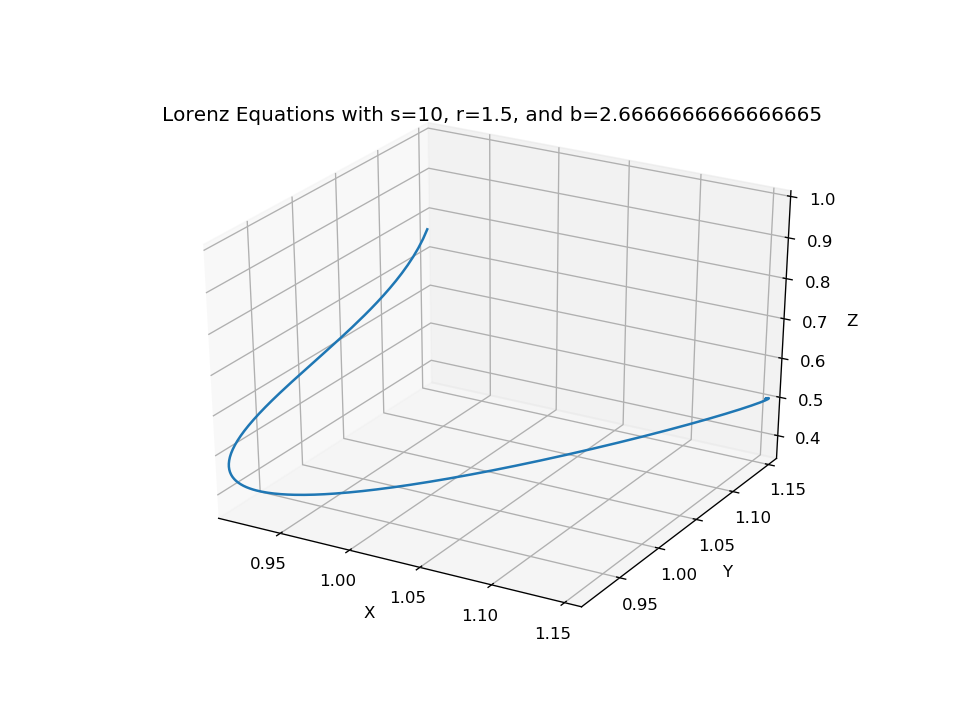

In [7]:
#Additional testing

#jacobian matrix of this stystem is:
#     [ -s    s    0 ]
#     [ r-z  -1   -x ]
#     [ y     x   -b ]

#analysis of equilibrium point behavior at s (origin)
for i in range(1,6,1):
    jcob1 = array([[(-i),(i),(0)],
              [(28),(-1),(0)],
              [(0),(0),(-8/3)]])
    print("\nEigenvalue for when s = ",str(i))
    eigenVals1,temp = linalg.eig(jcob1)
    print(eigenVals1,'\n')

#analysis of equilibrium point behavior at s (non-origin)
for i in range(1,6,1):
    jcob1 = array([[(-i),(i),(0)],
              [(1),(-1),(8.48528137423857)],
              [(-8.48528137423857),(-8.48528137423857),(-8/3)]])
    print("\nEigenvalue for when s = ",str(i))
    eigenVals1,temp = linalg.eig(jcob1)
    print(eigenVals1,'\n')

#analysis of equilibrium point behavior at b (origin)
for i in range(1,6,1):
    jcob1 = array([[(-10),(10),(0)],
              [(28),(-1),(0)],
              [(0),(0),(-i)]])
    print("\nEigenvalue for when b = ",str(i))
    eigenVals1,temp = linalg.eig(jcob1)
    print(eigenVals1,'\n')

#analysis of equilibrium point behavior at b (non-origin)
for i in range(1,6,1):
    jcob1 = array([[(-10),(10),(0)],
                  [(1),(-1),(3*sqrt(3*i))],
                  [(-3*sqrt(3*i)),(-3*sqrt(3*i)),(-i)]])
    print("\nEigenvalue for when b = ",str(i))
    eigenVals1,temp = linalg.eig(jcob1)
    print(eigenVals1,'\n')

#Observations - origin always remains an unstable
#saddle point

x, y, z, times = allVals(1,1,1,r=1.5)
phaseSpace3D(x,y,z,r=1.5)